In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
df = pd.read_csv(r"C:\Users\chukw\Downloads\ML, AI\Streamlit\data\train (1).csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
def percent_missing(df):
    missing = (df.isnull().sum().sort_values(ascending = False)/len(df))*100
    return missing

In [5]:
percent_missing(df)

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64

In [6]:
corr_matrix = df.corr(numeric_only = True)
corr_matrix = corr_matrix["SalePrice"]
print(corr_matrix.sort_values(ascending = False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

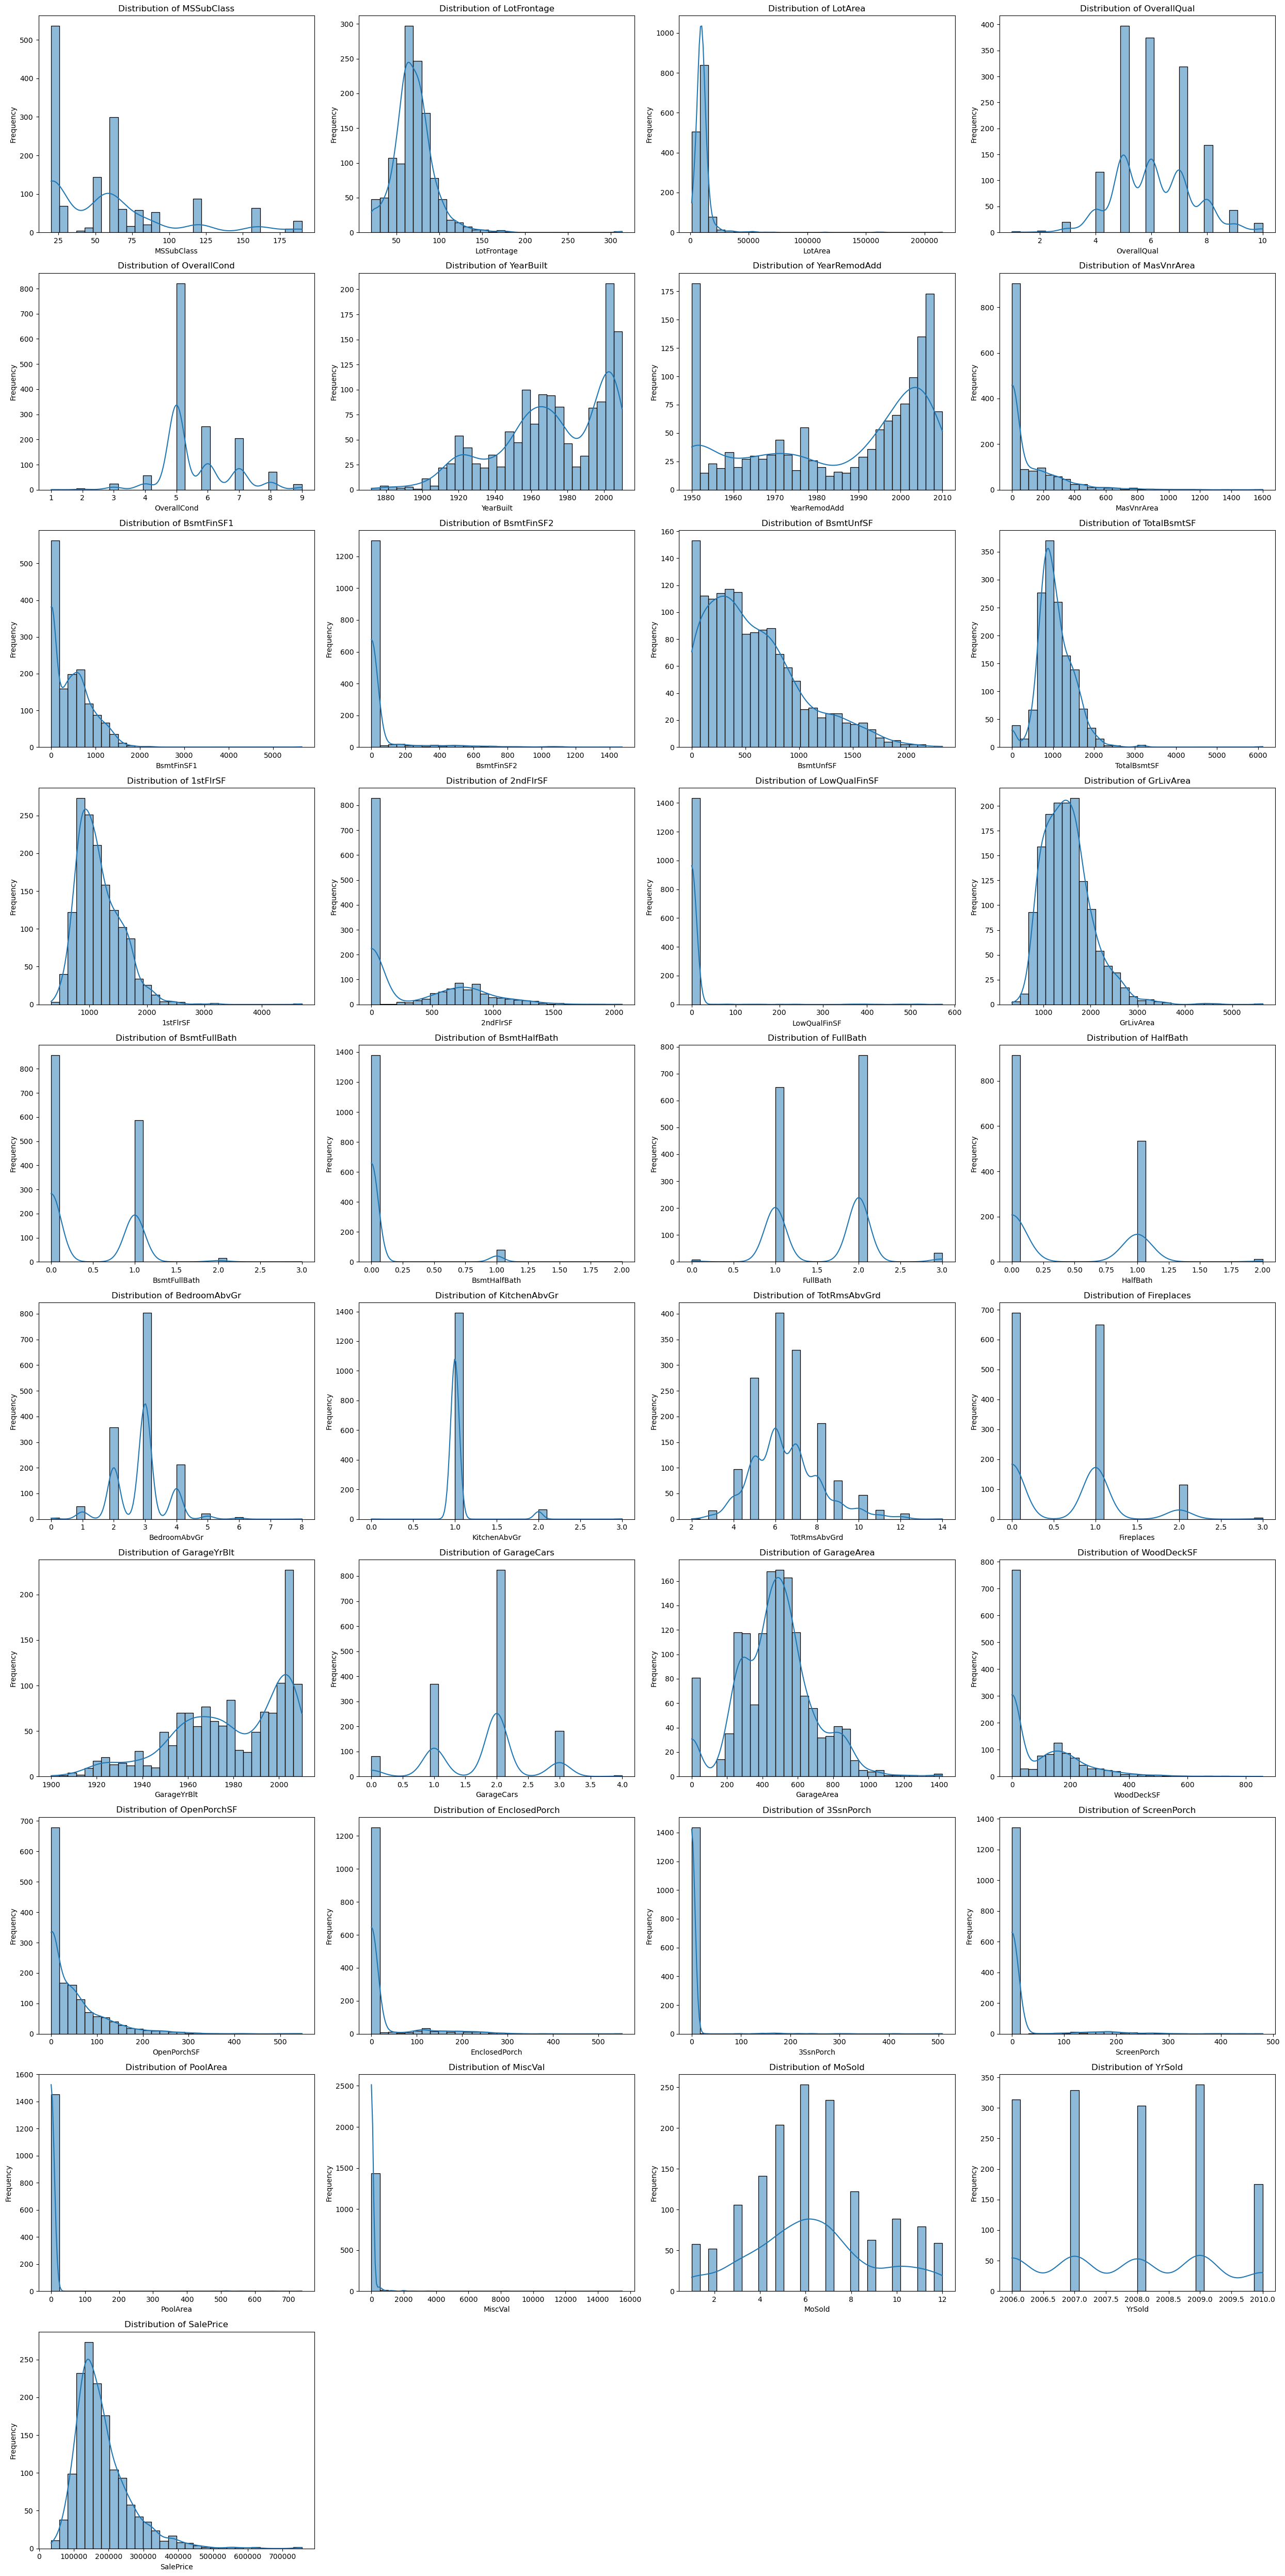

In [7]:
num_col=df.select_dtypes(include=['float','int']).drop('Id',axis=1).columns
fig,axes=plt.subplots(nrows=int(np.ceil(len(num_col)/4)),ncols=4,figsize=(25,50))
axes=axes.flatten()
for i, col in enumerate(num_col):
    sns.histplot(df[col],kde=True,bins=30,ax=axes[i])
    #warnings.simplefilter(action='ignore',category=FutureWarning)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

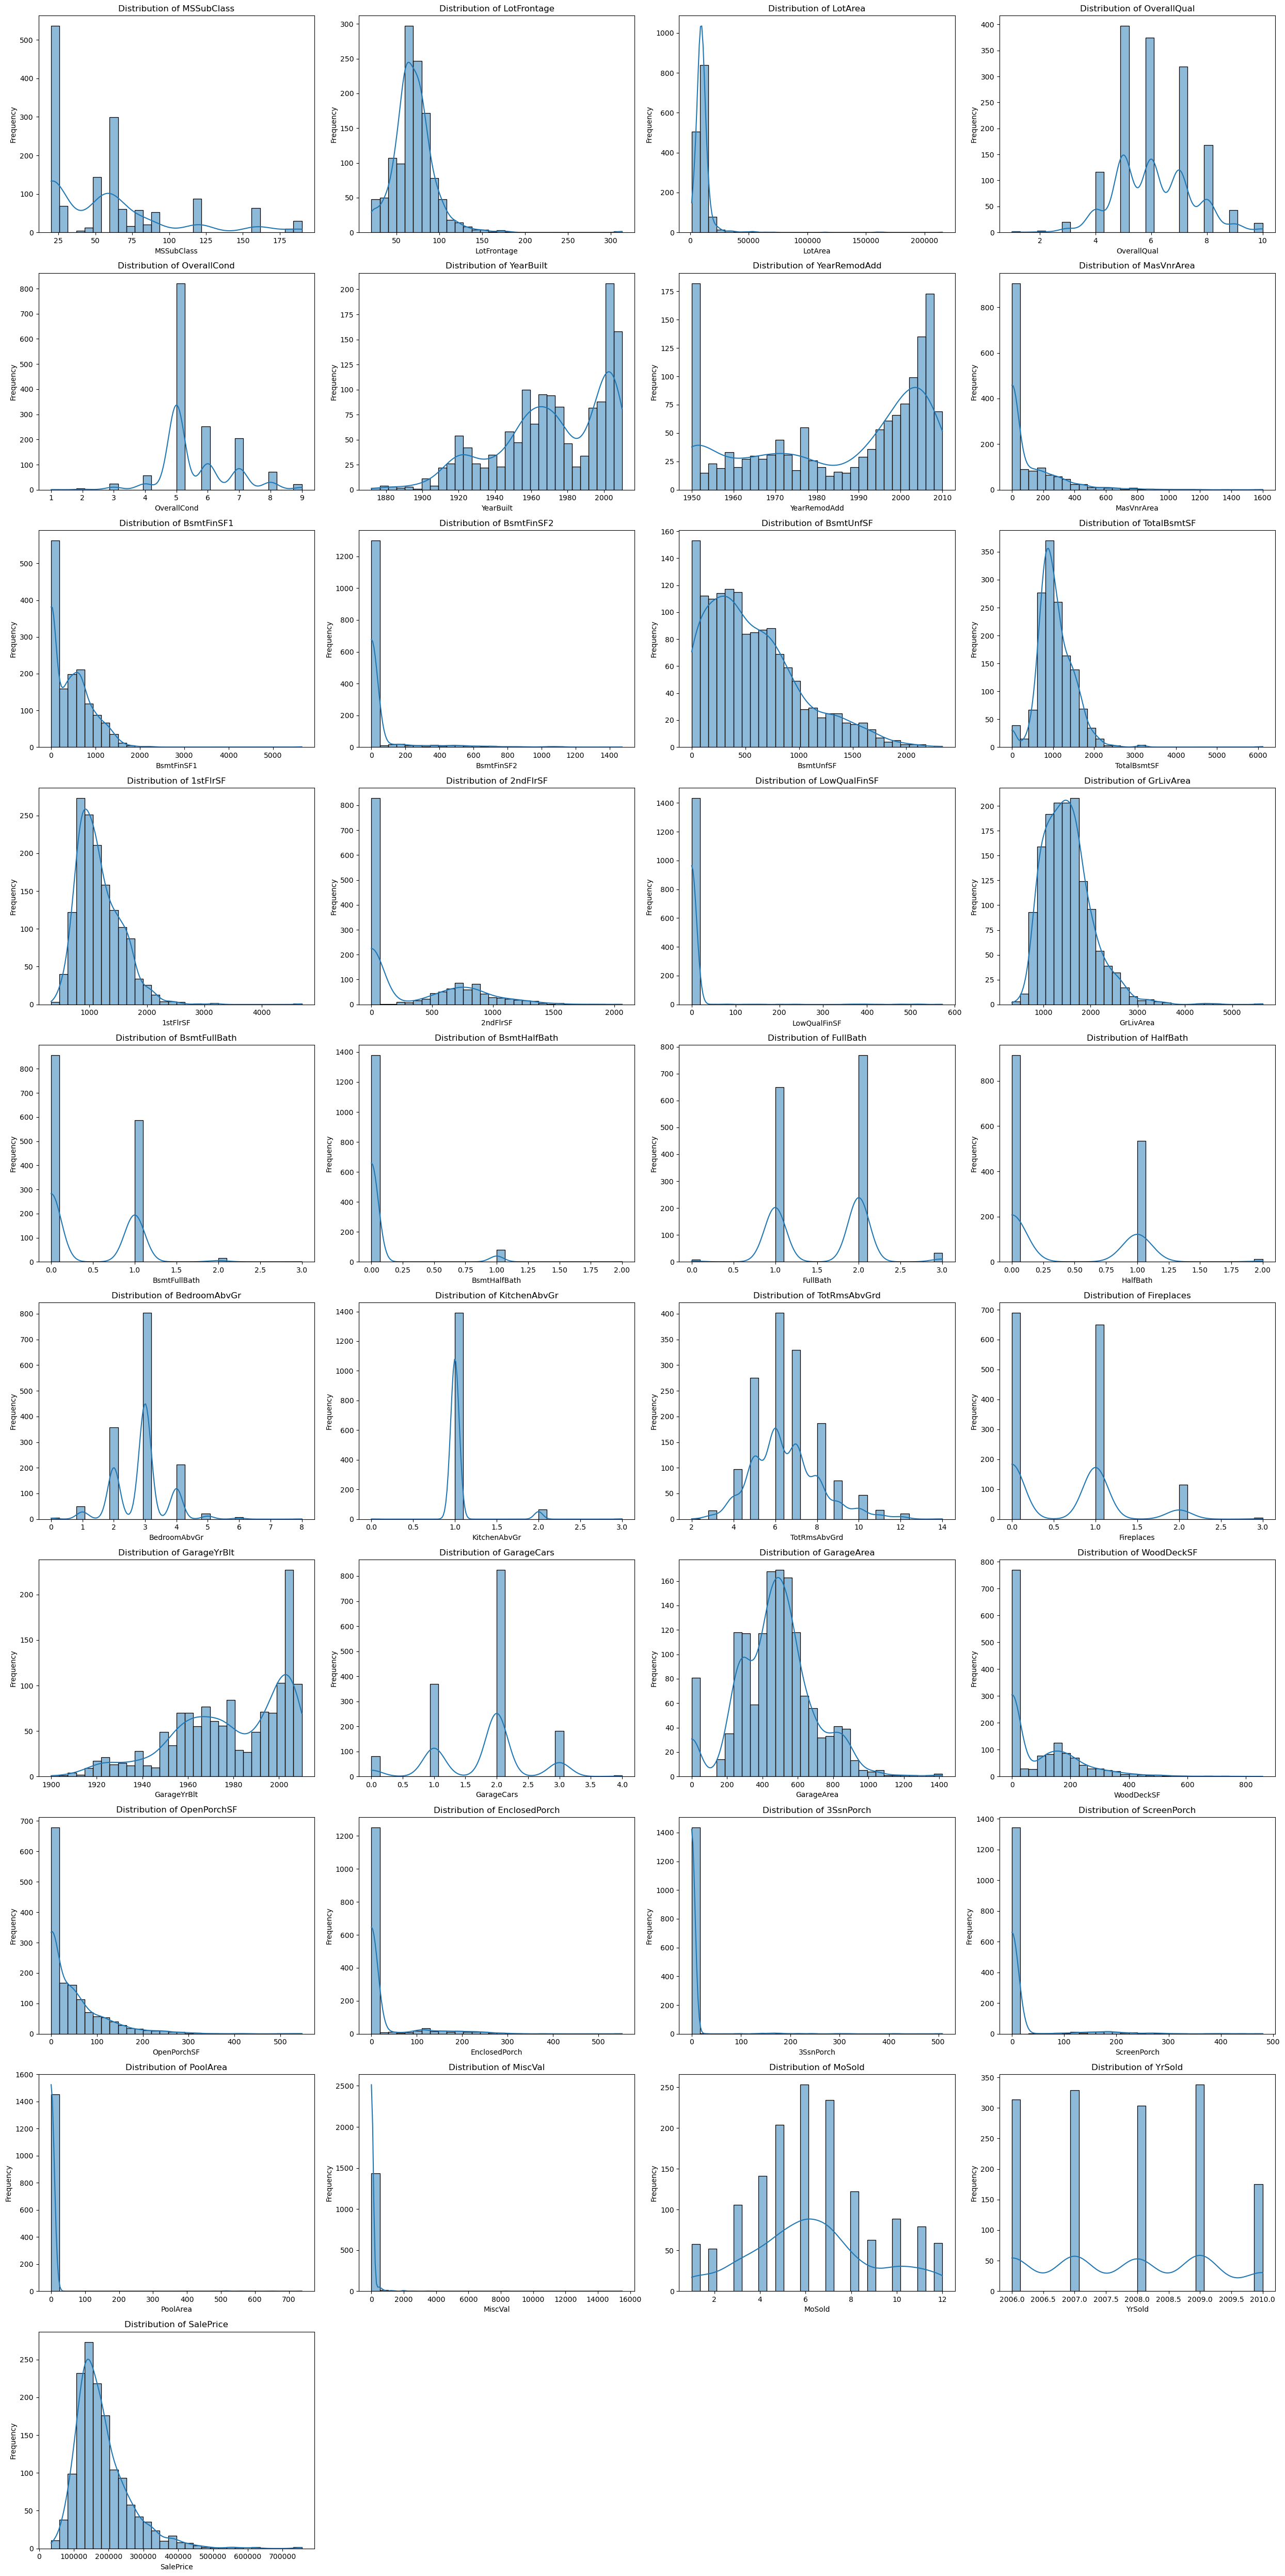

In [8]:
num_col=df.select_dtypes(include=['float','int']).drop('Id',axis=1).columns
fig,axes=plt.subplots(nrows=int(np.ceil(len(num_col)/4)),ncols=4,figsize=(25,50))
axes=axes.flatten()
for i, col in enumerate(num_col):
    sns.histplot(df[col],kde=True,bins=30,ax=axes[i])
    #warnings.simplefilter(action='ignore',category=FutureWarning)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

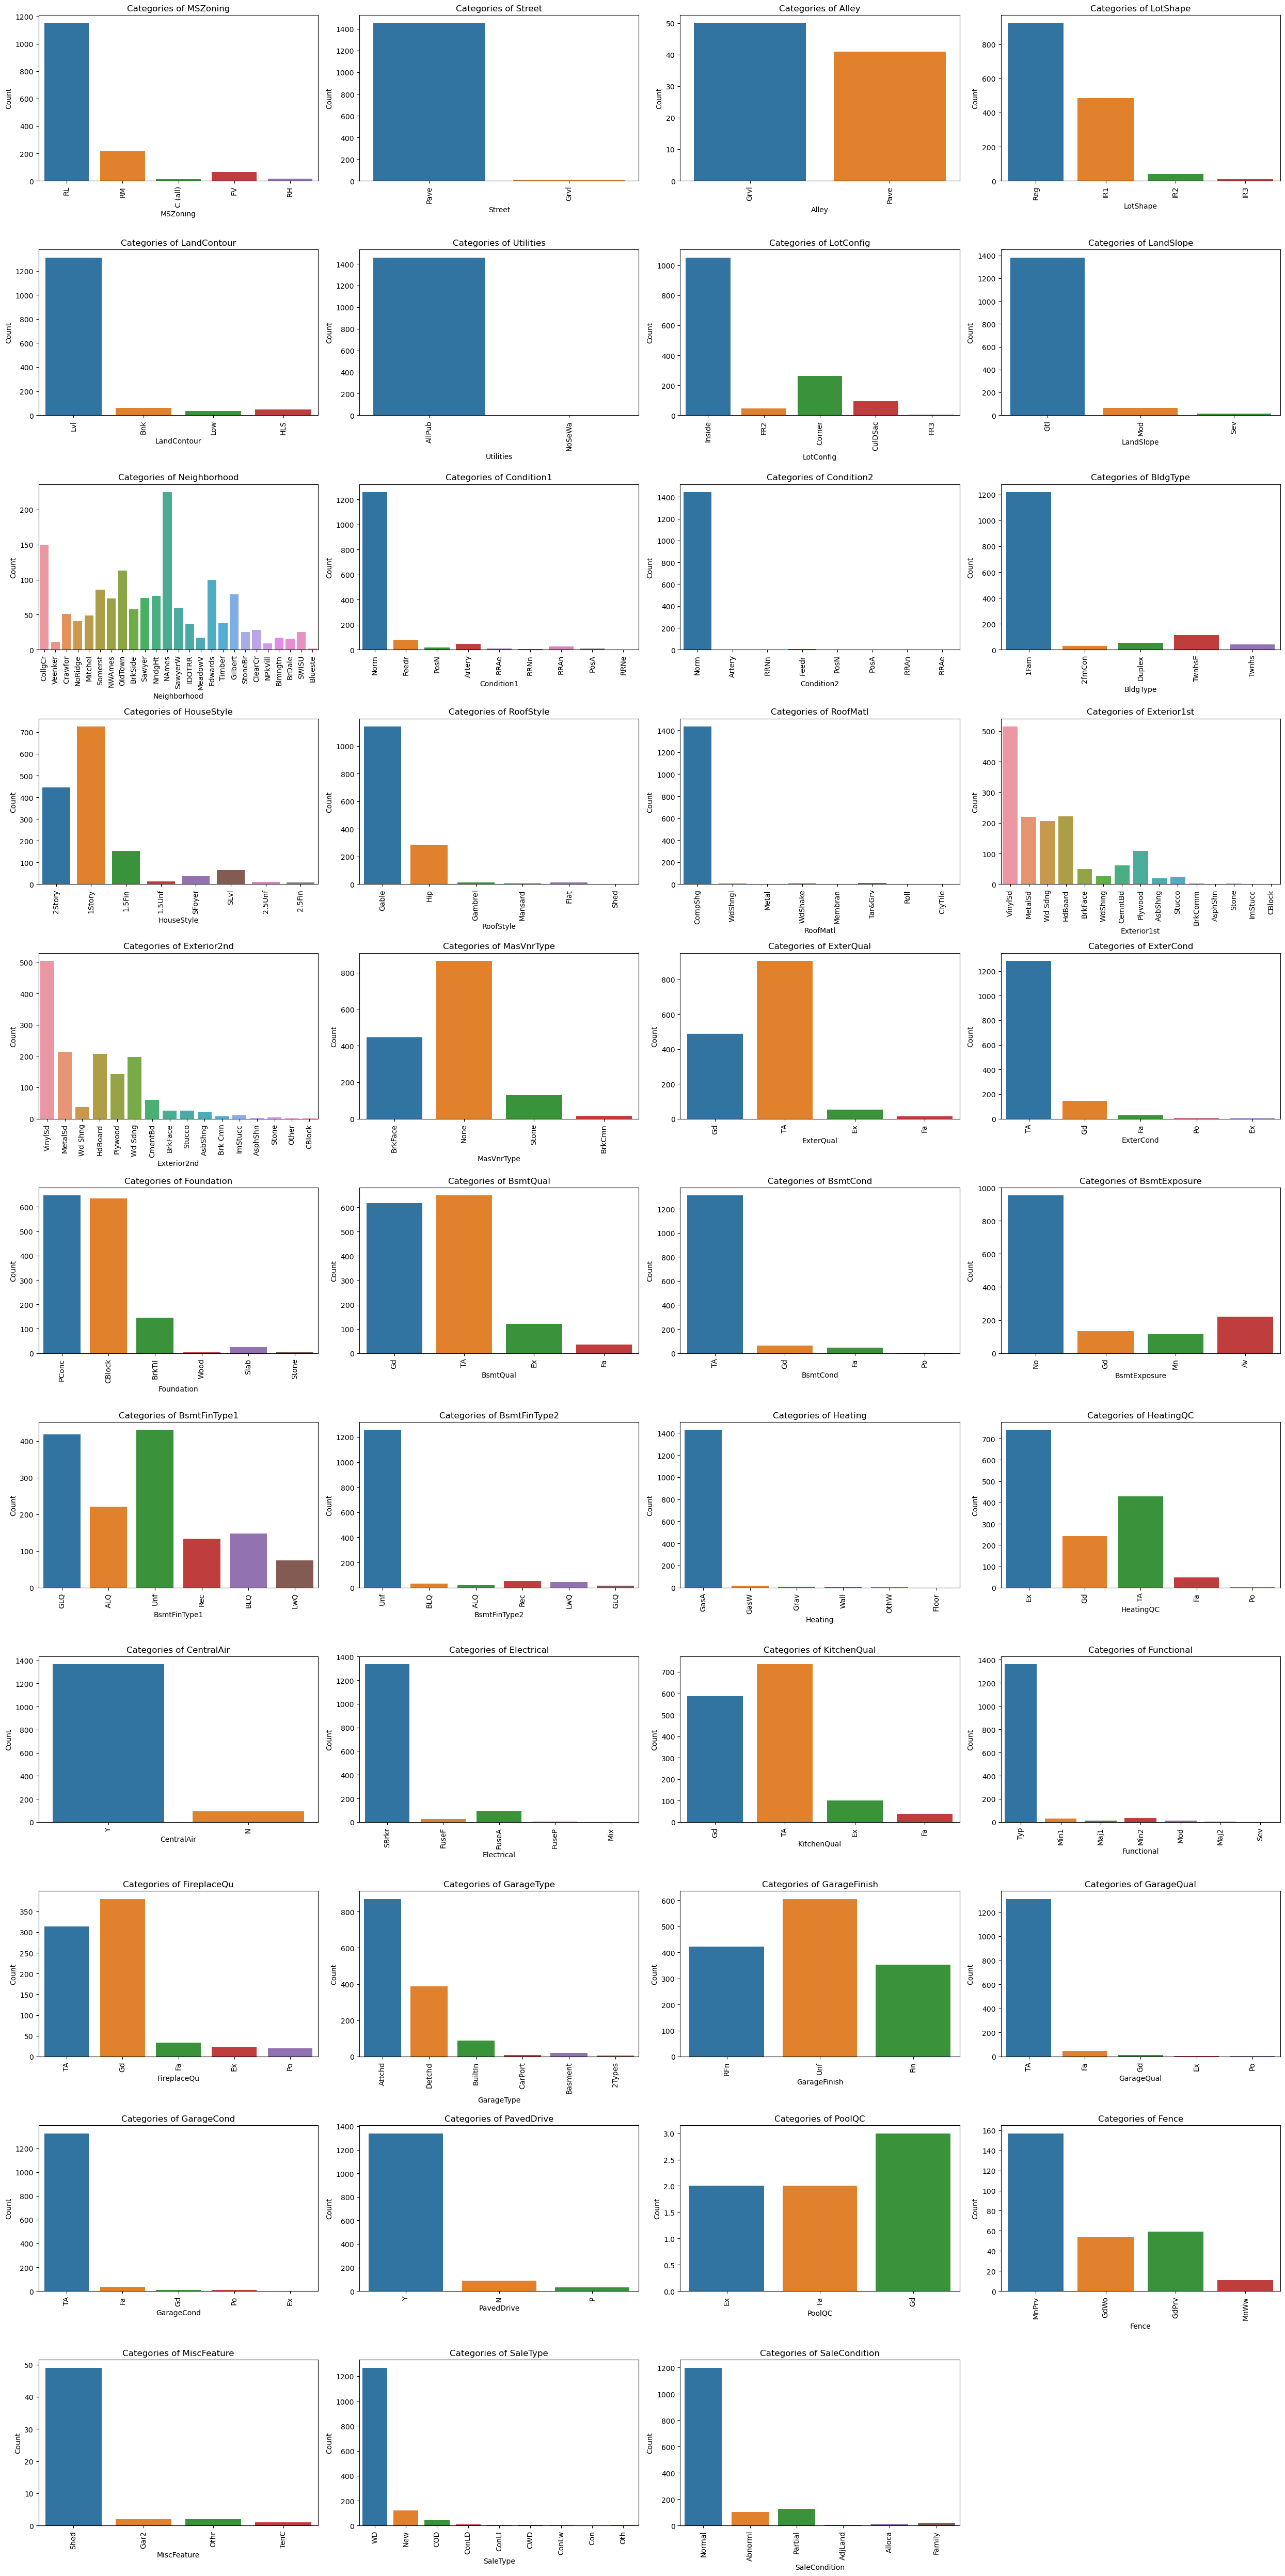

In [9]:
cat_col=df.select_dtypes(include=['object']).columns
num_rows=int(np.ceil(len(cat_col)/4))
fig,axes=plt.subplots(nrows=num_rows,ncols=4,figsize=(25, 50))
axes=axes.flatten()

for i, col in enumerate(cat_col):
    sns.countplot(data = df,x = col, ax=axes[i])
    #warnings.simplefilter(action='ignore',category=FutureWarning)
    axes[i].set_title(f"Categories of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x',rotation=90)
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [10]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

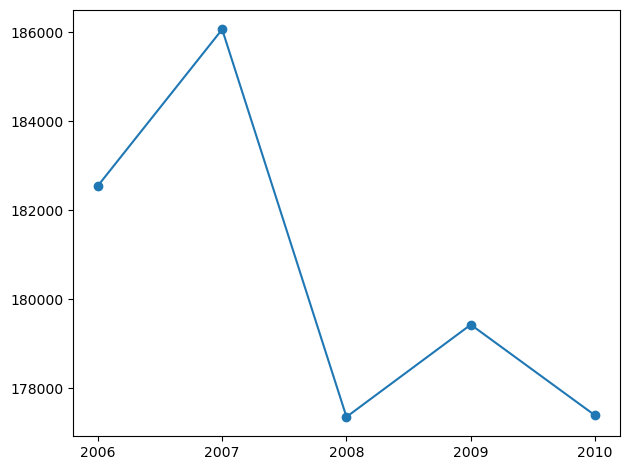

In [29]:
result_2 = df.groupby(['YrSold']).mean(numeric_only=True)['SalePrice']
plt.figure()
plt.plot(result_2.index,result_2.values, marker= 'o')
plt.xticks(result_2.index)
plt.tight_layout()
plt.show()

In [28]:
result_2 = df.groupby(['YrSold']).mean(numeric_only=True)['SalePrice']
result_2

YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64

In [13]:
df[df["Alley"].notnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
56,57,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml,172500
79,80,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,110000
87,88,160,FV,40.0,3951,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,164500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1405,50,RL,60.0,10410,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2006,WD,Family,105000
1414,1415,50,RL,64.0,13053,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,207000
1427,1428,50,RL,60.0,10930,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,140000
1432,1433,30,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,64500


In [18]:
df["YrSold"].unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

## Preprocessing

In [52]:
null_counts = df.isnull().sum()

# Filter the columns that have null values
null_columns = null_counts[null_counts > 0]
print(null_columns)

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


In [51]:
df.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature", "MasVnrType"], axis = 1, inplace = True)

In [45]:
df["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [57]:
df["LotFrontage"].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [66]:
df["LotFrontage"] = df["LotFrontage"].fillna(np.mean(df["LotFrontage"]))
df["MasVnrArea"] = df["MasVnrArea"].fillna(np.mean(df["MasVnrArea"]))


In [63]:
np.mean(df["LotFrontage"])

70.04995836802665

In [71]:
df["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [72]:
df["BsmtCond"].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [73]:
basement_features=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
df[basement_features]=df[basement_features].fillna('No Basement')

In [75]:
garage_features=['GarageType','GarageFinish','GarageQual','GarageCond']
df[garage_features]=df[garage_features].fillna('No Garage')

In [76]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(0)
df['GarageYrBlt']=df['GarageYrBlt'].astype(int)

In [77]:
gar_num_features=['GarageCars','GarageArea']
for i in gar_num_features:
    df[i]=df[i].fillna(df[i].median())

In [78]:
from sklearn.preprocessing import LabelEncoder

In [81]:
cat_col = df.select_dtypes(include = "object").columns
le = LabelEncoder()
for col in cat_col:
    df[col]=le.fit_transform(df[col])

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   MSZoning       1460 non-null   int32
 3   LotFrontage    1460 non-null   int32
 4   LotArea        1460 non-null   int64
 5   Street         1460 non-null   int32
 6   LotShape       1460 non-null   int32
 7   LandContour    1460 non-null   int32
 8   Utilities      1460 non-null   int32
 9   LotConfig      1460 non-null   int32
 10  LandSlope      1460 non-null   int32
 11  Neighborhood   1460 non-null   int32
 12  Condition1     1460 non-null   int32
 13  Condition2     1460 non-null   int32
 14  BldgType       1460 non-null   int32
 15  HouseStyle     1460 non-null   int32
 16  OverallQual    1460 non-null   int64
 17  OverallCond    1460 non-null   int64
 18  YearBuilt      1460 non-null   int64
 19  YearRe

In [97]:
df[df.select_dtypes(include=['float']).columns]=df.select_dtypes(include=['float']).astype(int)

In [90]:
df["MasVnrArea"] = df["MasVnrArea"].fillna(np.mean(df["MasVnrArea"]))

In [99]:
X = df.drop("SalePrice", axis = 1)
y = df["SalePrice"]

In [123]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [114]:
param_grid = {"l1_ratio": [0.01, 0.1,1], "eps": [0.001, 0.01, 0.1, 0.1], "n_alphas" :[100, 23,50,200]}

In [115]:
elastic_net_cv = ElasticNetCV()
grid_search = GridSearchCV(estimator=elastic_net_cv, param_grid=param_grid, cv=5)

In [116]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [117]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNetCV(),
             param_grid={'eps': [0.001, 0.01, 0.1, 0.1],
                         'l1_ratio': [0.01, 0.1, 1],
                         'n_alphas': [100, 23, 50, 200]})

In [119]:
grid_search.best_params_

{'eps': 0.001, 'l1_ratio': 1, 'n_alphas': 100}

In [120]:
y_pred = grid_search.predict(X_test)

In [124]:
print('MAE :',mean_absolute_error(y_test,y_pred))
print('r2_score :',r2_score(y_test,y_pred))

MAE : 26452.07327701199
r2_score : 0.5749759961601492
